In [107]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


Exploring the malware dataset

data: https://github.com/PacktPublishing/Mastering-Machine-Learning-for-Penetration-Testing/blob/master/Chapter03/MalwareData.csv.gz

In [108]:
malData = pd.read_csv('MalwareData.csv', sep='|', low_memory=True)
malData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [109]:
malData.shape


(138047, 57)

In [110]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [111]:
legit = malData[0:41323].drop(['legitimate'], axis=1)
mal = malData[42323::].drop(['legitimate'], axis=1)
print('The shape of the legit dataset is: %s samples, %s features'%(legit.shape[0],legit.shape[1]))
print('The shape of the malware dataset is: %s samples, %s features'%(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the malware dataset is: 95724 samples, 56 features


<function matplotlib.pyplot.show(close=None, block=None)>

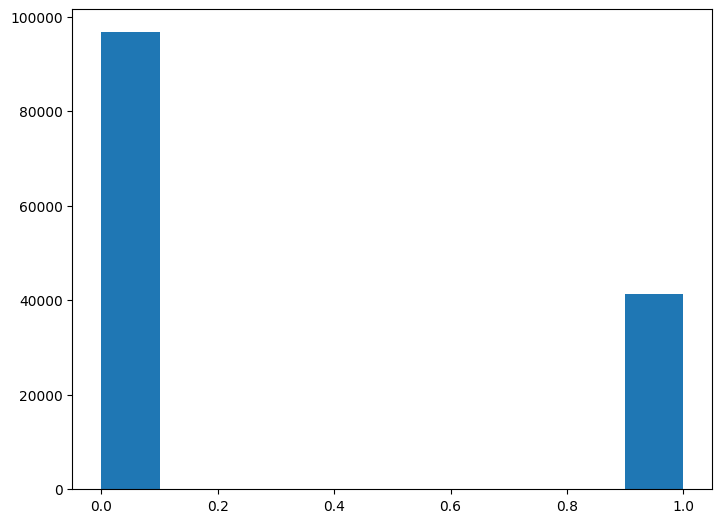

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(malData['legitimate'])
plt.show

Data cleaning

In [113]:
y = malData['legitimate']
malData = malData.drop(['legitimate'], axis=1)

In [114]:
# removing non important features

malData = malData.drop(['Name'], axis=1)
malData = malData.drop(['md5'], axis=1)
print('Then Name and md5 columns features have been removed')

Then Name and md5 columns features have been removed


Splitting the dataset into test and train

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(malData, y, test_size=0.2, random_state=42)

In [116]:
X_train.shape

(110437, 54)

Model building

1 - Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
randomModel = clf.fit(X_train, y_train)

Random forest evaluation on test data

In [118]:
from sklearn.metrics import f1_score, accuracy_score, auc, confusion_matrix

In [119]:
# accuracy on the train dataset

train_pred = randomModel.predict(X_train)

accuracy_score(y_train, train_pred)

0.9828318407780001

In [120]:
# accuracy on the test dataset

prediction = randomModel.predict(X_test)

accuracy_score(y_test, prediction)

0.9838102136906918

In [121]:
f1_score(y_test, prediction)

0.9730933606212002

Confusion matrix

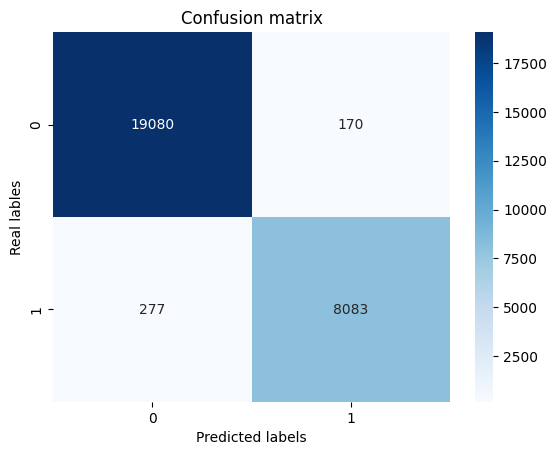

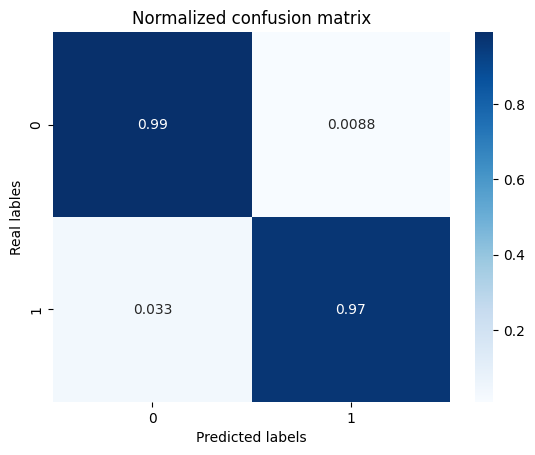

In [122]:
cmatrix = confusion_matrix(y_test, prediction)
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Real lables')
plt.title('Confusion matrix')

plt.show()

# normalized confusion matrix

total_per_class = cmatrix.sum(axis=1)
normalized_cmatrix = cmatrix / total_per_class[:, np.newaxis]
sns.heatmap(normalized_cmatrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Real lables')
plt.title('Normalized confusion matrix')

plt.show()



2 - Logistic regression

In [123]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
logModel = clf.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


Model evaluation

In [124]:
# Accuracy on the train dataset 

train_log = logModel.predict(X_train)
accuracy_score(y_train, train_log)


0.7015221347917817

In [125]:
# Accuracy on the test dataset

pred = logModel.predict(X_test)
accuracy_score(y_test, pred)

0.6972111553784861

Confusion matrix

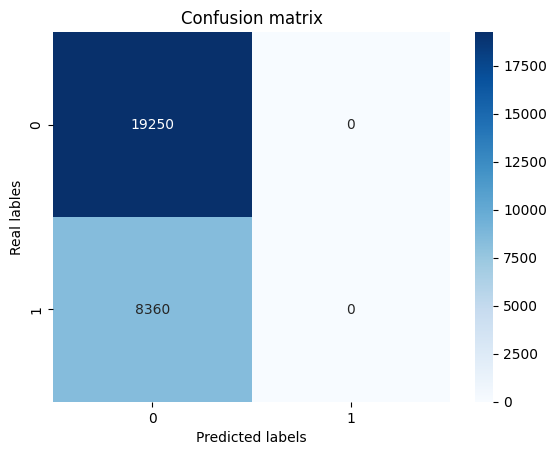

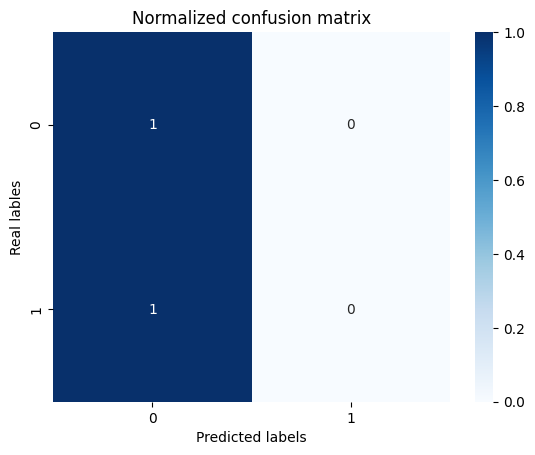

In [126]:
cmatrix_log = confusion_matrix(y_test, pred)
sns.heatmap(cmatrix_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Real lables')
plt.title('Confusion matrix')

plt.show()

# normalized confusion matrix

total_per_class = cmatrix_log.sum(axis=1)
normalized_cmatrix_log = cmatrix_log / total_per_class[:, np.newaxis]
sns.heatmap(normalized_cmatrix_log, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Real lables')
plt.title('Normalized confusion matrix')

plt.show()


Neural network

In [137]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [138]:
# Defining model 

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=54), # num_caracteristicas es el número de características en tus datos
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # Capa de salida con función de activación sigmoide para clasificación binaria
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                3520      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
# Compile model 
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [140]:
 # Fit model
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 2s 427us/step - loss: 20251674.0000 - accuracy: 0.9463
Epoch 2/5
3452/3452 [==============================] - 2s 435us/step - loss: 16728199.0000 - accuracy: 0.9527
Epoch 3/5
3452/3452 [==============================] - 2s 435us/step - loss: 13463517.0000 - accuracy: 0.9524
Epoch 4/5
3452/3452 [==============================] - 2s 444us/step - loss: 8987101.0000 - accuracy: 0.9544
Epoch 5/5
3452/3452 [==============================] - 2s 493us/step - loss: 12159787.0000 - accuracy: 0.9546


In [141]:
# Accuracy on the training dataset
trainPred=model.predict(X_train)

trainPred=[1 if y>= 0.5 else 0   for y in trainPred]

accuracy_score(y_train,trainPred)

3452/3452 [==============================] - 1s 252us/step


0.9759319793185255

In [142]:
# Accuracy on the test dataset
y_prediction=model.predict(X_test)

y_prediction=[1 if y>= 0.5 else 0   for y in y_prediction]

accuracy_score(y_test, y_prediction)

863/863 [==============================] - 0s 257us/step


0.9755885548714234

In [143]:
confusion_matrix(y_test,y_prediction)


array([[18926,   324],
       [  350,  8010]])

In [144]:
f1_score(y_test,y_prediction)

0.9596262130106625